## Objective: to create a predictive model for crime_rate with decision tree

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
crime = pd.read_excel('D:/OneDrive/Desktop/Python Projects/Course/Crime.xlsx')

In [7]:
crime.head()
crime.columns

Index(['land_area', 'percent_city', 'percent_senior', 'physicians',
       'hospital_beds', 'graduates', 'work_force', 'income', 'region',
       'crime_rate'],
      dtype='object')

In [8]:
crime.isnull().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

In [9]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land_area       99 non-null     int64  
 1   percent_city    99 non-null     float64
 2   percent_senior  99 non-null     float64
 3   physicians      99 non-null     int64  
 4   hospital_beds   99 non-null     int64  
 5   graduates       99 non-null     float64
 6   work_force      99 non-null     float64
 7   income          99 non-null     int64  
 8   region          99 non-null     int64  
 9   crime_rate      99 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


In [10]:
crime.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643757
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.471362
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.321839
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.112486
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.061290
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.859055
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.622010


array([[<Axes: title={'center': 'land_area'}>,
        <Axes: title={'center': 'percent_city'}>,
        <Axes: title={'center': 'percent_senior'}>],
       [<Axes: title={'center': 'physicians'}>,
        <Axes: title={'center': 'hospital_beds'}>,
        <Axes: title={'center': 'graduates'}>],
       [<Axes: title={'center': 'work_force'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'crime_rate'}>, <Axes: >, <Axes: >]],
      dtype=object)

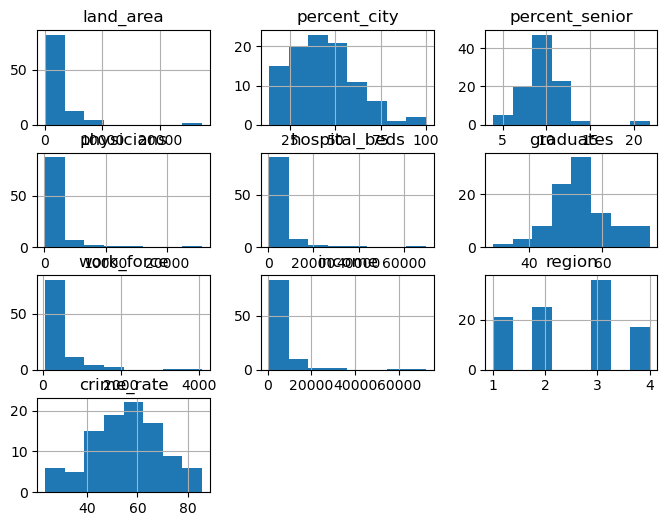

In [11]:
crime.hist(bins =  8, figsize=(8,6))

# Creating Target and Input Variables

In [13]:
x = crime.drop('crime_rate', axis = 1)
y = crime['crime_rate']

# Train and Test

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state= 123)


# Building ML model

In [17]:
from sklearn.tree import DecisionTreeRegressor
#select model
model =  DecisionTreeRegressor(random_state=1)
#train model
model.fit(x_train,y_train)





DecisionTreeRegressor(random_state=1)

# Evaluate the model on training sample

In [50]:
model.score(x_train,y_train)

1.0

In [52]:
# cross validate model on train sample
from sklearn.model_selection import cross_validate
cross_validate(model, x_train, y_train, cv=5)

{'fit_time': array([0.00475192, 0.00350213, 0.00307226, 0.00659204, 0.00714231]),
 'score_time': array([0.00189805, 0.00100255, 0.00202513, 0.00453138, 0.00307798]),
 'test_score': array([-3.05612516, -0.0258573 ,  0.55941157,  0.04484673, -0.66242195])}


# Evaluate the model on the test sample


In [58]:

model.score(x_test,y_test)

0.3410458502569499

In [32]:
from sklearn.tree import export_graphviz
import graphviz

In [34]:
dot_data= export_graphviz(model, out_file=None,
feature_names=x_test.columns,
class_names=['0', '1'],
filled=True, rounded=True,
special_characters=True)

In [36]:
graph1=graphviz.Source(dot_data)

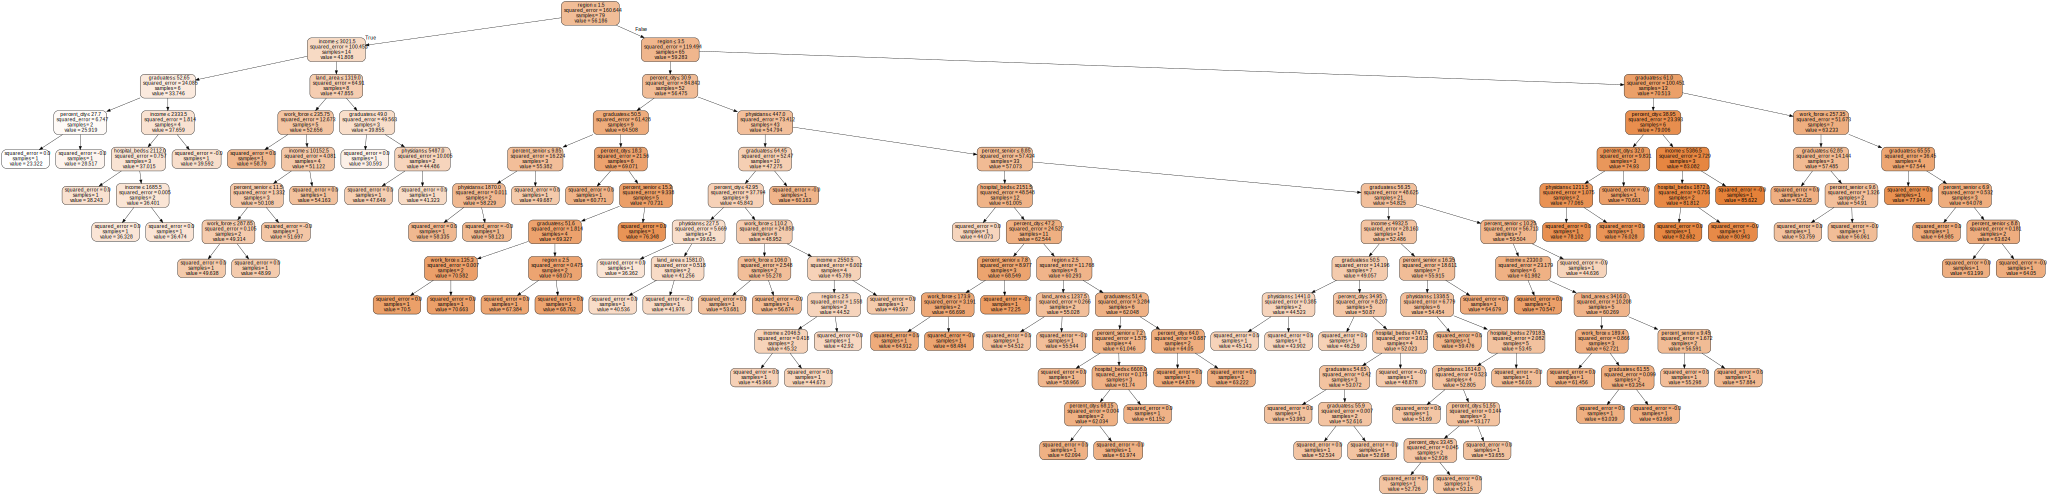

In [38]:
graph1

In [42]:
model_improved =  DecisionTreeRegressor(max_depth = 3, random_state=1)
model_improved.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [60]:

model_improved.score(x_train,y_train)

0.6497922272362582

In [62]:

model_improved.score(x_test,y_test)

0.3112041466730656

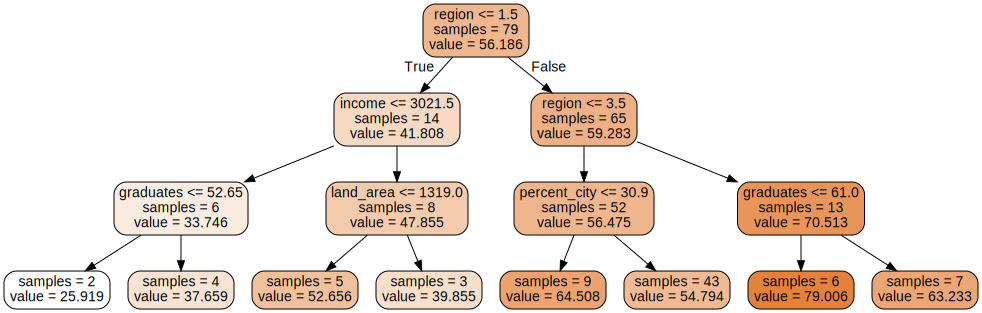

In [44]:
dot_data= export_graphviz(model_improved, out_file=None,impurity=False,
feature_names=x_test.columns,
class_names=['0', '1'],
filled=True, rounded=True)
graph2=graphviz.Source(dot_data)
graph2

#Training is the process where the model identifies the most significant features and uses them to split the data effectively. 
#In this case, the algorithm determined that Region is the most influential factor. 